In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
def hoocnerChia(a, value):
    b = []
    b.append(a[0])
    for i in range(1, len(a)):
        b.append(b[i - 1] * value + a[i])
    return b

In [3]:
def hoocnerNhanBosung(coeffPolyTich, t):
    if len(coeffPolyTich) == 0:
        coeffPolyTich.append(1)
        coeffPolyTich.append(-t)
    else:
        coeffPolyTich.append(0)
        temp = coeffPolyTich.copy()
        for i in range(1, len(coeffPolyTich)):
            coeffPolyTich[i] = coeffPolyTich[i] - t * temp[i - 1]
    return coeffPolyTich

In [4]:
def saiPhan(f_0, f_1, yk, x0, xk):
    if xk > x0:
        temp = f_0.copy()
        f_0.append(0)
        f_0[0] = yk
        for i in range(1, len(f_0)):
            f_0[i] = f_0[i - 1] - temp[i - 1]
        f_1.append(f_0[len(f_0) - 1])
    else:
        temp = f_1.copy()
        f_1.append(0)
        f_1[0] = yk
        for i in range(1, len(f_1)):
            f_1[i] = temp[i - 1] - f_1[i - 1]
        f_0.append(f_1[len(f_1) - 1])
    return f_0, f_1

In [5]:
def noiSuyTrungTamGauss(heSodaThuc, coeffTich, f_0, f_1, k, x0, xk, yk, giaiThua_k, choose):
    if k == 0:
        heSodaThuc.append(yk)
        f_0.append(yk)
        f_1.append(yk)
        giaiThua_k = 1
    else:
        heSoDaThucCu = heSodaThuc.copy()
        f_0, f_1 = saiPhan(f_0, f_1, yk, x0, xk)
        giaiThua_k *= len(heSodaThuc)

        #do qua trinh thay t vao thi k sai lech 1 don vi
        if choose == "Gauss1":
            if k > 0:
                k = k - 1
        if choose == "Gauss2":
            if k < 0:
                k = k + 1
        coeffTich = hoocnerNhanBosung(coeffTich, - k)
        c = f_1[len(f_1) - 1] / giaiThua_k
        heSodaThuc.append(0)
        for i in range(1, len(heSodaThuc)):
            heSodaThuc[i] = heSoDaThucCu[i - 1] + c * coeffTich[i]
        heSodaThuc[0] = c
    return heSodaThuc, coeffTich, f_0, f_1, giaiThua_k

In [6]:
def sortData(path):
    if path.endswith('.csv'):
        data = pd.read_csv(path)
    elif path.endswith('.txt'):
        print("su dung doc file .txt")
    dataX = data['x']
    dataY = data['y']
    for i in range(len(dataX)):
        indexMin = i
        for j in range(i + 1, len(dataX)):
            if dataX[j] < dataX[indexMin]:
                indexMin = j
        if indexMin != i:
            dataX[indexMin], dataX[i] = dataX[i], dataX[indexMin]
            dataY[indexMin], dataY[i] = dataY[i], dataY[indexMin]
    return dataX, dataY

# Nhap vao moc noi suy ban dau

## Truyen du lieu vao

In [7]:
path = 'input.csv'
dataX, dataY = sortData(path)
def kiemTraMoc(dataX, x0):
    h = dataX[1] - dataX[0]
    m = round((x0 - dataX[0])/h)
    if x0 > dataX[len(dataX) - 1] or x0 < dataX[0] or x0 - (dataX[0] + m * h) > 1e-10:
        print("Moc noi suy duoc chon ban dau la khong hop le")
        print("Quay lai, chon lai moc noi suy")
    else:
        print("Moc noi suy ban dau hop le. Chuong trinh tiep tuc")


## Chon moc noi suy ban dau x0

In [8]:
#Lua chon moc noi suy ban dau
x0 = 0.6
kiemTraMoc(dataX, x0)

Moc noi suy ban dau hop le. Chuong trinh tiep tuc


# Chon so moc noi suy su dung

In [9]:
def checkSoMoc(dataX, soMoc, x0):
    h = dataX[1] - dataX[0]
    m = round((x0 - dataX[0])/h)
    if m <= len(dataX)/2:
        n = 2 * m + 1
    else:
        n = 2 * (len(dataX) - m) + 1
    if n > len(dataX):
        n = len(dataX)
        
    #check xem so moc chon co hop le hay khong
    if soMoc > n or soMoc <= 0 or soMoc % 2 == 0:
        print("so luong moc lua chon la khong hop le")
        print("Nhap lai so moc. So moc phai la so le thuoc trong khoang tu:", 0, "->", n)
    else:
        print("so luong moc la hop le. Tiep tuc chuong trinh")

In [10]:
#lua chon so moc
soMoc = 3
checkSoMoc(dataX, soMoc, x0)

so luong moc la hop le. Tiep tuc chuong trinh


# Sap du lieu theo Gauss1 hoac Gauss2

In [11]:
def sortGauss1(dataX, dataY, x0, soMoc):
    x = []
    y = []
    m = round((x0 - dataX[0]) / (dataX[1] - dataX[0]))
    for i in range(soMoc):
        if i % 2 == 1:
            k = int((i + 1)/2)
            x.append(dataX[m + k])
            y.append(dataY[m + k])
        else:
            k = int(-(i + 1)/2)
            x.append(dataX[m + k])
            y.append(dataY[m + k])
    return x, y

In [12]:
def sortGauss2(dataX, dataY, x0, soMoc):
    x = []
    y = []
    m = round((x0 - dataX[0]) / (dataX[1] - dataX[0]))
    for i in range(soMoc):
        if i % 2 == 1:
            k = int(-(i + 1)/2)
            x.append(dataX[m + k])
            y.append(dataY[m + k])
        else:
            k = int((i + 1)/2)
            x.append(dataX[m + k])
            y.append(dataY[m + k])
    return x, y

# Ham main chay chuong trinh chinh

In [13]:
def main(choose):
    heSodaThuc = []
    coeffTich = []
    f_0 = [] 
    f_1 = [] 
    giaiThua_k = 1
    h = dataX[1] - dataX[0]
    m = round((x0 - dataX[0])/h)
    with open("output.txt", "w") as out:
        if choose == "Gauss1":
            x, y = sortGauss1(dataX, dataY, x0, soMoc)
            for i in range(soMoc):
                if i % 2 == 1:
                    k = int((i + 1)/2)
                else:
                    k = int(-(i + 1)/2)
                heSodaThuc, coeffTich, f_0, f_1, giaiThua_k = noiSuyTrungTamGauss(heSodaThuc, coeffTich, f_0, f_1, k, x0, x[i], y[i], giaiThua_k, choose)
                
                out.writelines("\n\n--------------------------------------------------------------------------------------")
                out.writelines("\nDa thuc moi sau khi them moc noi suy: (x[{0}] = {1},  y[{0}] = {2}): ".format(m + k, x[i], y[i]))
                out.write("\nTap cac moc noi suy: \t")
                for j in range(i + 1):
                    out.write("({}, {}); \t".format(x[j], y[j]))
                out.write("\nDa thuc bac {}: \nP(t) =: ".format(i))
                for j in range(len(heSodaThuc)):
                    out.write("{} * x^{} \t + \t".format(heSodaThuc[j], len(heSodaThuc) - 1 - j))
                out.write("\n\nThu lai\n")
                for j in range(i + 1):
                    out.writelines("\nTai du lieu x = {}".format(x[j]))
                    a = hoocnerChia(heSodaThuc, (x[j] - x[0])/h)
                    out.writelines("\nPn(x) - y = {}".format(a[len(heSodaThuc) - 1] - y[j]))
        elif choose == "Gauss2":
            x, y = sortGauss2(dataX, dataY, x0, soMoc)
            for i in range(soMoc):
                if i % 2 == 1:
                    k = int(-(i + 1)/2)
                else:
                    k = int((i + 1)/2)
                heSodaThuc, coeffTich, f_0, f_1, giaiThua_k = noiSuyTrungTamGauss(heSodaThuc, coeffTich, f_0, f_1, k, x0, x[i], y[i], giaiThua_k, choose)
                
                out.writelines("\n\n--------------------------------------------------------------------------------------")
                out.writelines("\nDa thuc moi sau khi them moc noi suy: (x[{0}] = {1},  y[{0}] = {2}): ".format(m + k, x[i], y[i]))
                out.write("\nTap cac moc noi suy: \t")
                for j in range(i + 1):
                    out.write("({}, {}); \t".format(x[j], y[j]))
                out.write("\nDa thuc bac {}: \nP(t) =: ".format(i))
                for j in range(len(heSodaThuc)):
                    out.write("{} * x^{} \t + \t".format(heSodaThuc[j], len(heSodaThuc) - 1 - j))
                out.write("\n\nThu lai\n")
                for j in range(i + 1):
                    out.writelines("\nTai du lieu x = {}".format(x[j]))
                    a = hoocnerChia(heSodaThuc, (x[j] - x[0])/h)
                    out.writelines("\nPn(x) - y = {}".format(a[len(heSodaThuc) - 1] - y[j]))
    return heSodaThuc, coeffTich, f_0, f_1, giaiThua_k

# Lua chon chuong trinh chay theo Gauss1 hoac Gauss2

In [14]:
choose = "Gauss1"
# choose = "Gauss2"
heSodaThuc, coeffTich, f_0, f_1, giaiThua_k =  main(choose)

# Ve bieu do the hien output

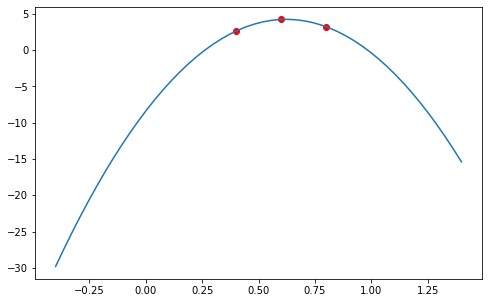

In [41]:
if choose == "Gauss1":
    x, y = sortGauss1(dataX, dataY, x0, soMoc)
elif choose == "Gauss2":
    x, y = sortGauss2(dataX, dataY, x0, soMoc)

xTest = np.linspace(x[0] - 1, x[len(x) - 1] + 1, 50)
h = dataX[1] - dataX[0]
result = []
for x1 in xTest:
    result.append(hoocnerChia(heSodaThuc, (x1 - x[0])/h)[len(heSodaThuc) - 1])

#ve bieu do duong
plt.plot(xTest, result)
plt.scatter(x, y, color = 'r')
fig = plt.gcf()
fig.set_size_inches(8,5, forward = False)

plt.show()